In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import seaborn as sb
import scipy
from scipy.stats import spearmanr
from sklearn import datasets
import statsmodels.api as sm
import numpy as np
import pandas as pd

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)
df.head()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:

# select ONLY numerics
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df = df.select_dtypes(include=numerics)

print(df.dtypes)


mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object


In [4]:

# Import library
from pca import pca

# Initialize pca to also detected outliers.
model = pca(normalize=True, detect_outliers=['ht2', 'spe'], n_std=2  )

# Fit and transform
results = model.fit_transform(df)


[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [11] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [32] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [32] unique colors! Available unique colors: [9].


(<Figure size 1500x1000 with 1 Axes>,
 <AxesSubplot: title={'center': 'Outliers marked using Hotellings T2 method.'}, xlabel='PC1 (60.0% expl.var)', ylabel='PC2 (24.0% expl.var)'>)

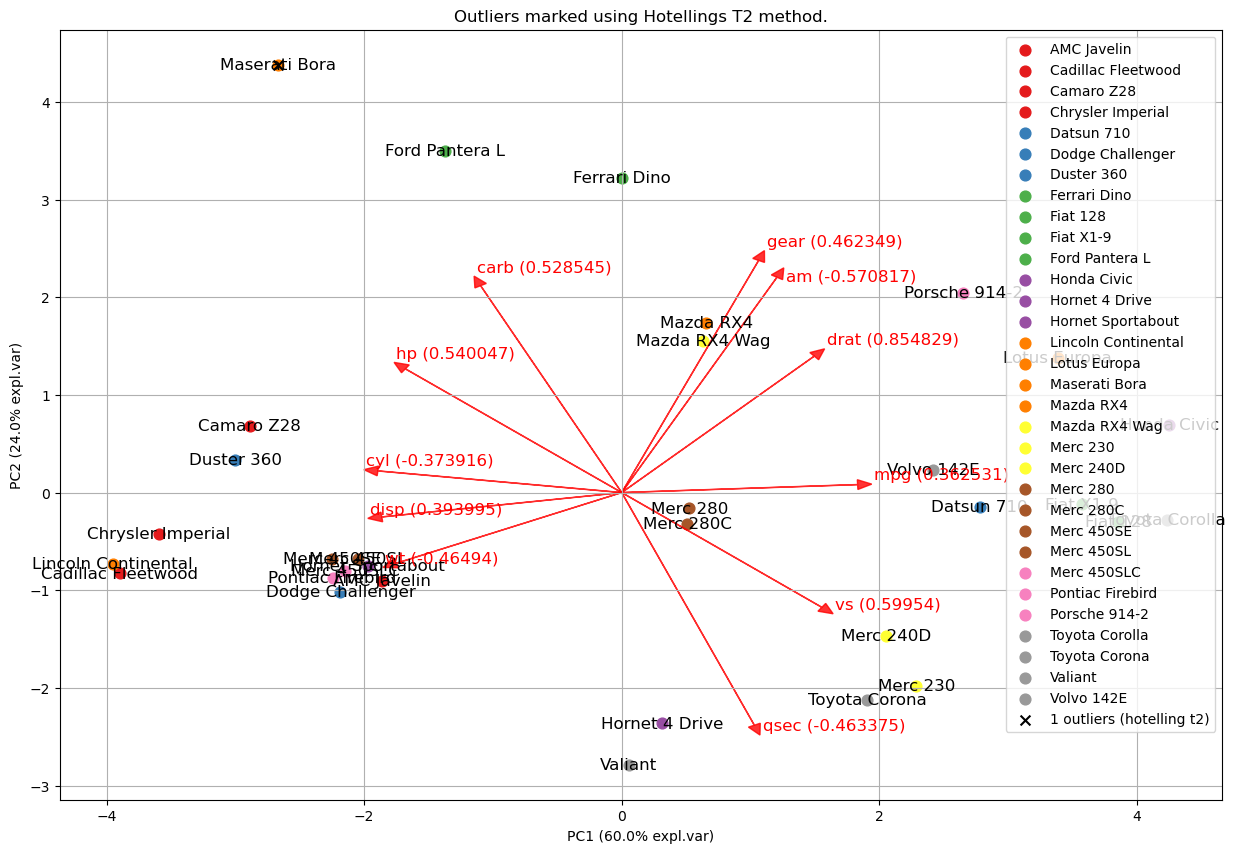

In [5]:

# Plot Hotellings T2
model.biplot(SPE=False, hotellingt2=True, title='Outliers marked using Hotellings T2 method.')


In [6]:

import matplotlib.pyplot as plt
X = df

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

from sklearn.decomposition import PCA
pca_5 = PCA(n_components=5, random_state=2020)
pca_5.fit(X_scaled)
X_pca_5 = pca_5.transform(X_scaled)

print('variance explained by 5 components = ', sum(pca_5.explained_variance_ratio_ * 100))


variance explained by 5 components =  94.35558142547879


Text(0, 0.5, 'explained variance')

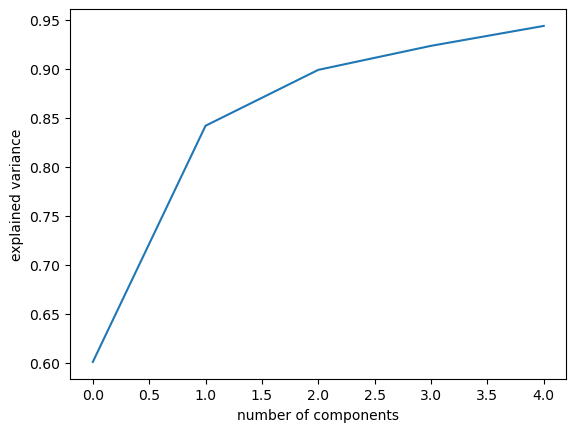

In [7]:

# The first component alone captures about 44.27% of the variability in the dataset and the second component alone captures about 18.97% of the variability in the dataset and so on.
pca_5.explained_variance_ratio_ * 100

np.cumsum(pca_5.explained_variance_ratio_ * 100)


plt.plot(np.cumsum(pca_5.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance')


Text(0.5, 0.92, '3D Scatterplot of 72% of Variability Captured')

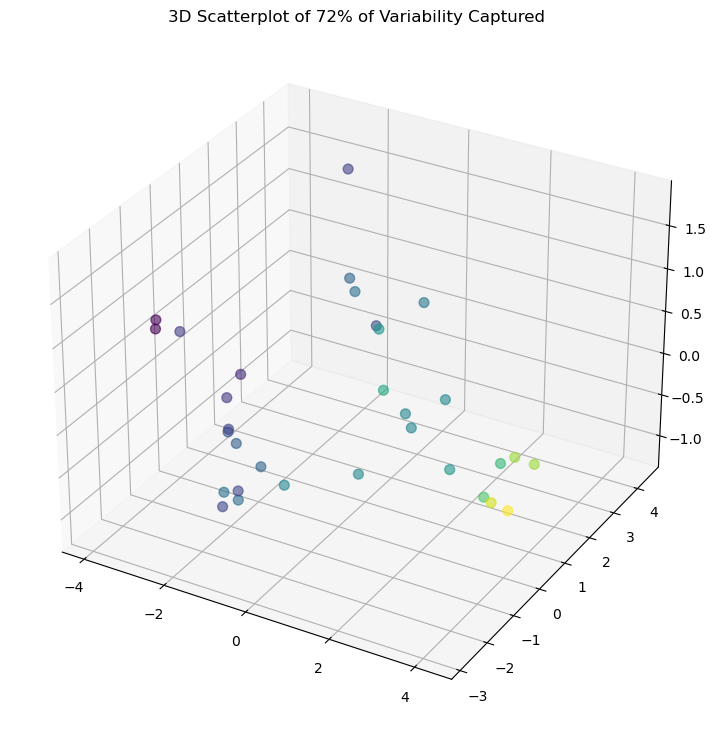

In [8]:

# three principal components
pca_3 = PCA(n_components=3, random_state=2020)
pca_3.fit(X_scaled)
X_pca_3 = pca_3.transform(X_scaled)

from mpl_toolkits import mplot3d
fig = plt.figure(figsize= (12,9))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca_3[:,0], X_pca_3[:,1], X_pca_3[:,2], c=df['mpg'], s=50, alpha=0.6)

plt.title('3D Scatterplot of 72% of Variability Captured')


In [11]:

import plotly.express as px
from sklearn.decomposition import PCA

X = df

pca = PCA(n_components=3)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['mpg'], size=df['mpg'])
fig.show()


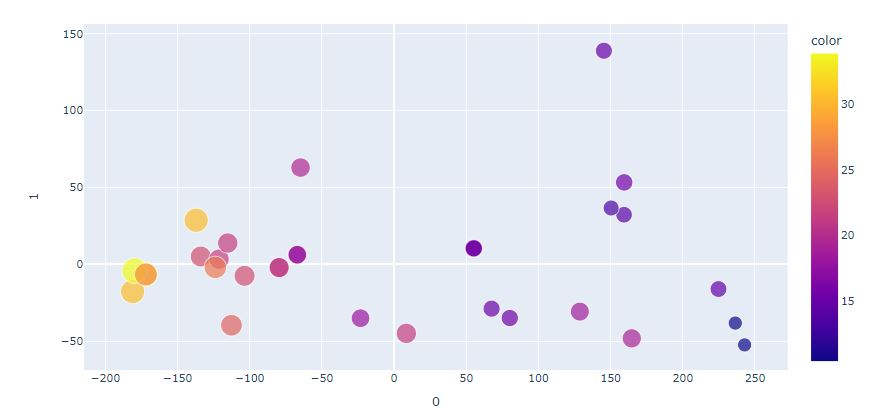

In [16]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = 'C:\\Users\\PCA - 3D Charts\\'
Image(filename = PATH + "Capture1.JPG", width=400, height=400)


In [13]:

import plotly.express as px
from sklearn.decomposition import PCA

X = df

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['mpg'], size=df['mpg'])
fig.show()


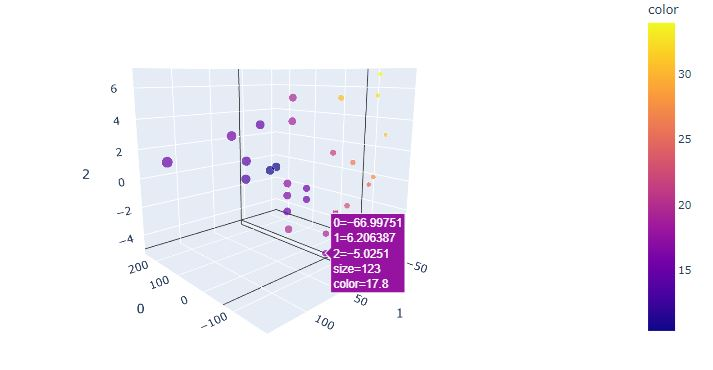

In [14]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = 'C:\\Users\\PCA - 3D Charts\\'
Image(filename = PATH + "Capture2.JPG", width=400, height=400)
